<a href="https://colab.research.google.com/github/rushika707/IIIT_HYD_Assignment/blob/main/Module_01_Lab_01_Features(HUB24090083).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>



In [40]:
url = "https://www.nationalgeographic.com/animals/mammals/facts/giraffe"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Example: Extract all paragraphs
paragraphs = soup.find_all('l')
for p in paragraphs:
    print(p.get_text())

In [41]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [43]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('es')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page("Elefante", auto_suggest=False).content

This is what the text looks like:

In [45]:
fr2

'Los elefantes o elefántidos (Elephantidae) son una familia de mamíferos placentarios del orden proboscideos. Antiguamente se clasificaban, junto con otros mamíferos de piel gruesa, en el orden, ahora inválido, de los paquidermos (Pachydermata). Existen hoy en día tres especies y diversas subespecies. Entre los géneros extintos de esta familia destacan los mamuts.\n\nLos elefantes son los animales terrestres más grandes que existen en la actualidad.[2]\u200b El periodo de gestación es de veintidós meses, el más largo en cualquier animal terrestre. El peso al nacer usualmente es 118 kg. Normalmente viven de cincuenta a setenta años, pero registros antiguos documentan edades máximas de ochenta y dos años.[3]\u200b El elefante más grande que se ha cazado, de los que se tiene registro, pesó alrededor de 11 000 kg (Angola, 1956),[4]\u200b alcanzando una altura en la cruz de 3,96 m, un metro más alto que el elefante africano promedio.[5]\u200b El elefante más pequeño, de alrededor del tamaño

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [46]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [47]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [48]:
fr1

'lasjirafadesudfricagiraffacamelopardalisgiraffaesunasubespeciedegiraffacamelopardaliscuyareaseextiendealsurdelcontinenteafricanosudfricanamibiabotsuanazimbabueysurdemozambiqueconbaseenestudiosgenticosalgunoslaconsideranunaespeciediferentesediferenciadelasotrassubespeciesconlasquesecruzafcilmenteporlasmanchasredondasoenformadeestrellapresentesentodoelpiehastalaspezuasreferenciasenlacesexternoswikispeciestieneunartculosobregiraffagiraffagiraffawikimediacommonsalbergaunacategoramultimediasobregiraffagiraffagiraffa'

In [49]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeshavebeenthoughtofasonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintofourextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaandindividualspeciescanbedistinguishedbytheirfurcoatpatternssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffesdistinguishingcharacteristicsareitsextremelylongneckandlegshornlikeossiconesandspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostothergroundbasedherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliv

# Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [50]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

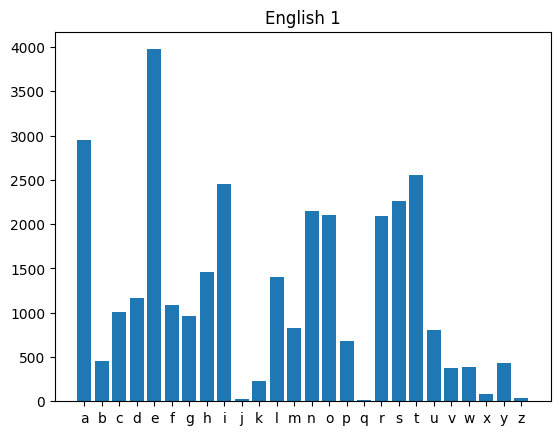

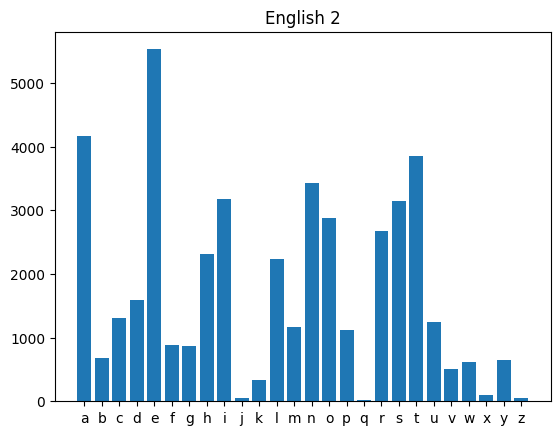

In [51]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

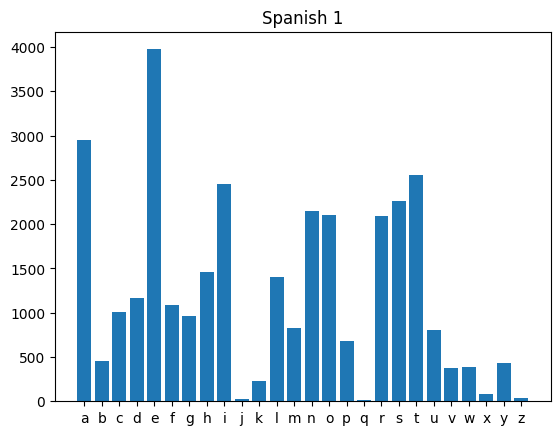

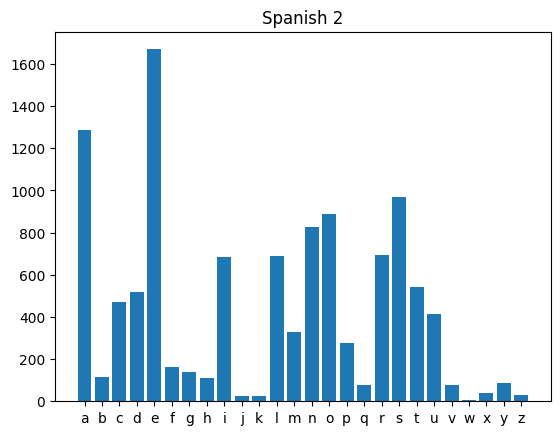

In [52]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('Spanish 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('Spanish 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

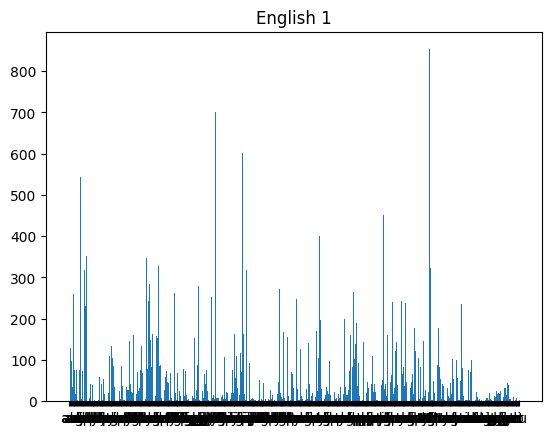

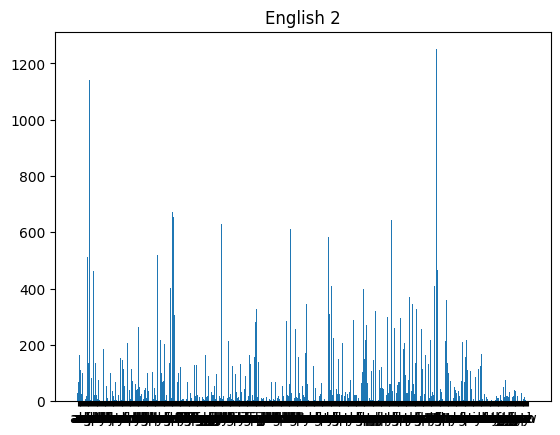

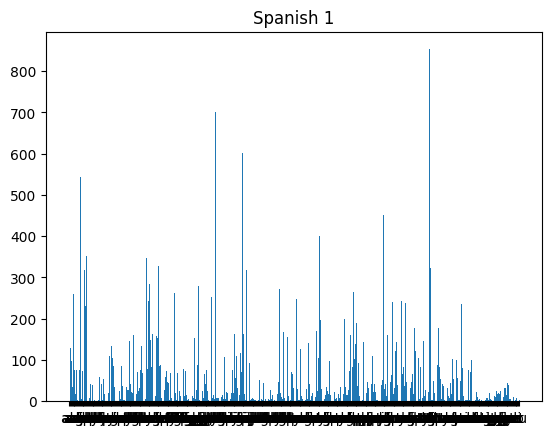

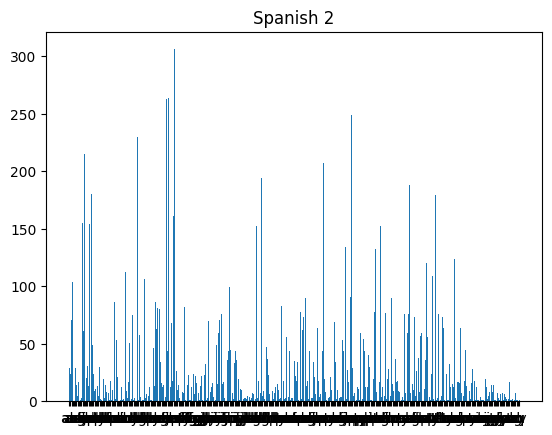

In [53]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('Spanish 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('Spanish 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [54]:
def plotbihistogram(ngram):
  freq = np.zeros((27,30))
  for ip in range(27):
    for jj in range(30):
      freq[ip,jj] = ngram[(chr(ord('a')+ip), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

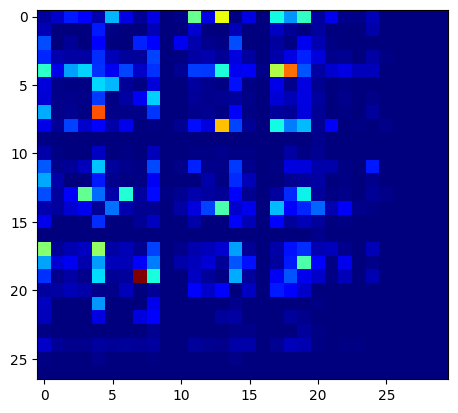

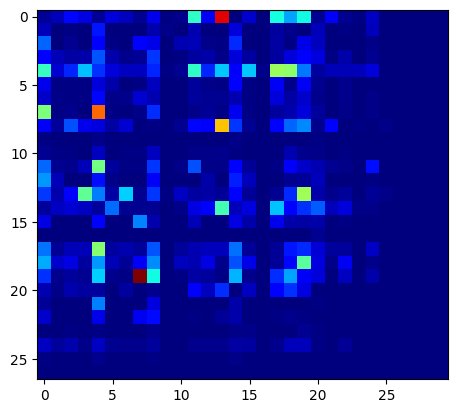

In [55]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

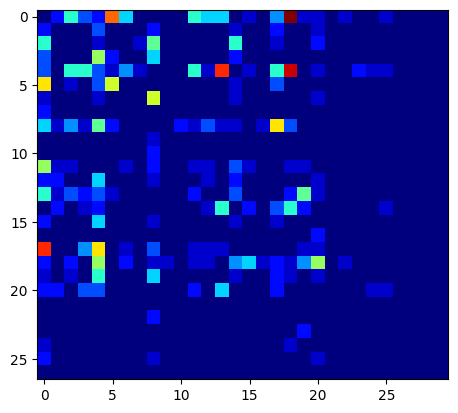

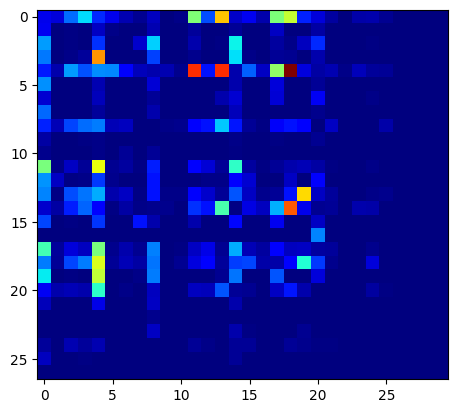

In [56]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [57]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/27)
  j = int(ind%27)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [59]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nSpanish 1:')
ShowTopN(bifr1)
print('\nSpanish 2:')
ShowTopN(bifr2)


English 1:
('v', 'k') : 853.0
('h', 'z') : 700.0
('f', 'd') : 674.0
('j', 'k') : 601.0
('a', 'n') : 543.0
('f', 'c') : 483.0
('t', 'b') : 452.0
('s', 'y') : 439.0
('a', 'l') : 406.0
('o', 'p') : 401.0

English 2:
('v', 'k') : 1250.0
('a', 'n') : 1140.0
('h', 'z') : 1000.0
('j', 'k') : 878.0
('p', 'e') : 679.0
('f', 'c') : 673.0
('f', 'd') : 653.0
('t', 'b') : 644.0
('h', 'v') : 628.0
('m', 'k') : 613.0

Spanish 1:
('a', 's') : 15.0
('f', 'd') : 14.0
('s', 'y') : 13.0
('e', 'z') : 13.0
('a', 'f') : 12.0
('t', 'b') : 10.0
('f', 'p') : 10.0
('j', 'o') : 10.0
('g', '{') : 9.0
('f', 'u') : 9.0

Spanish 2:
('f', 'd') : 306.0
('e', 'z') : 264.0
('e', 'x') : 263.0
('q', 'g') : 249.0
('d', 'n') : 230.0
('a', 'n') : 215.0
('p', 'e') : 207.0
('m', 'k') : 194.0
('u', 'e') : 188.0
('a', 's') : 180.0


visualizing trigrams and higher n-grams

In [61]:
import nltk
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Download the 'punkt' resource for sentence tokenization
nltk.download('punkt')

# Sample text (replace with your own text or Wikipedia content)
text = "Giraffes are the tallest living terrestrial animals and the largest ruminants. " \
       "They are known for their long necks and legs."

# Tokenize the text
tokens = nltk.word_tokenize(text.lower())

# Generate trigrams (3-grams)
trigrams = list(ngrams(tokens, 3))

# Count the frequency of trigrams
trigram_counts = Counter(trigrams)

# Display the top 10 most common trigrams
print(trigram_counts.most_common(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[(('giraffes', 'are', 'the'), 1), (('are', 'the', 'tallest'), 1), (('the', 'tallest', 'living'), 1), (('tallest', 'living', 'terrestrial'), 1), (('living', 'terrestrial', 'animals'), 1), (('terrestrial', 'animals', 'and'), 1), (('animals', 'and', 'the'), 1), (('and', 'the', 'largest'), 1), (('the', 'largest', 'ruminants'), 1), (('largest', 'ruminants', '.'), 1)]


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [63]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [64]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

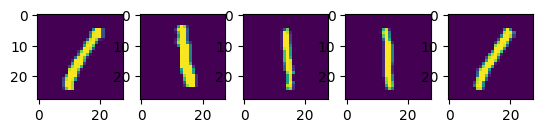

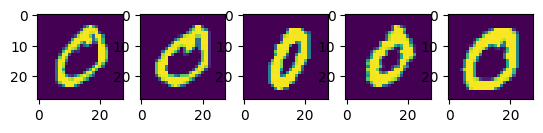

In [65]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [66]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

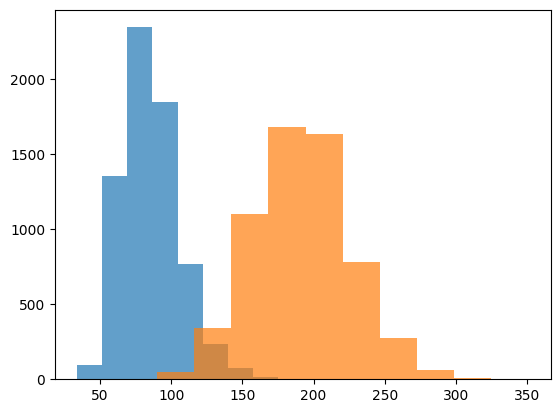

In [67]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [68]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

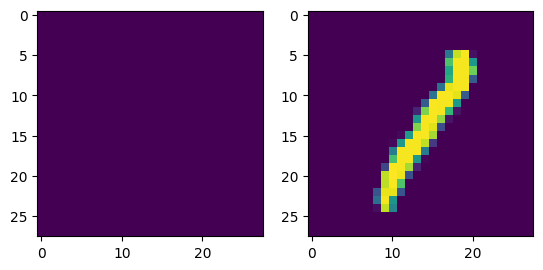

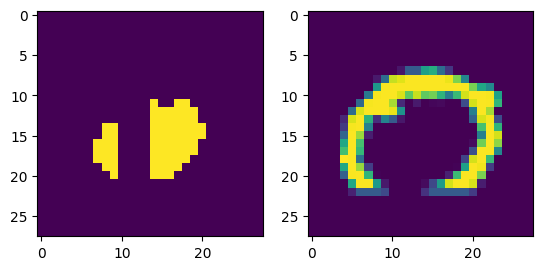

In [69]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

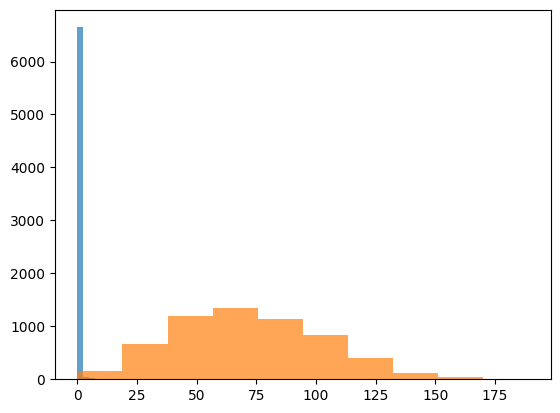

In [70]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [71]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

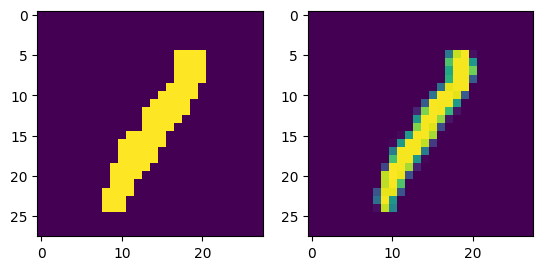

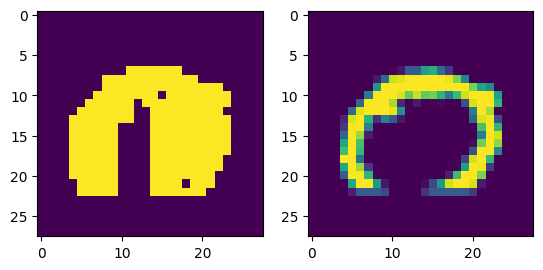

In [72]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

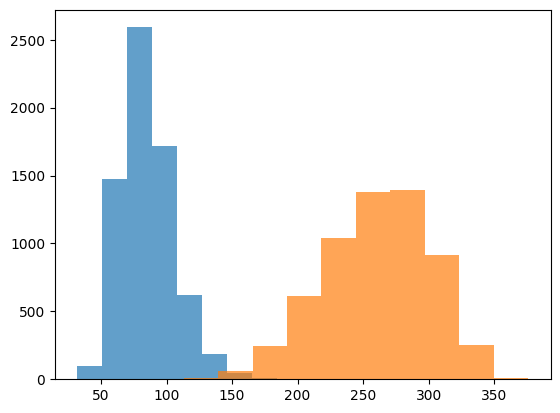

In [73]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [74]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

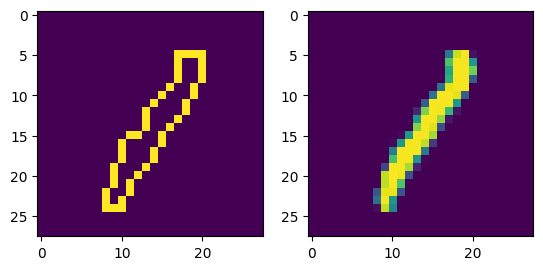

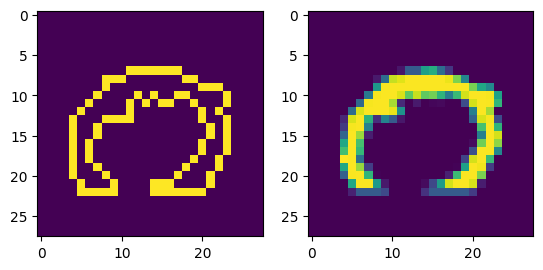

In [75]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

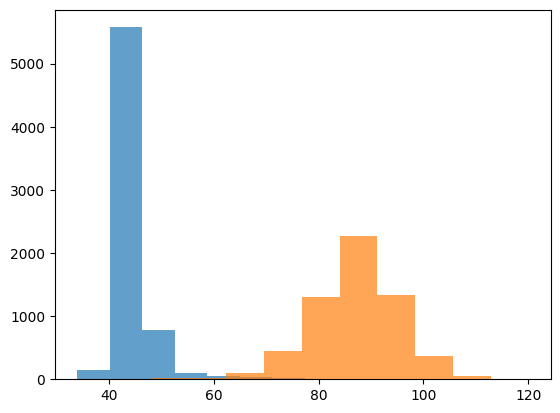

In [76]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

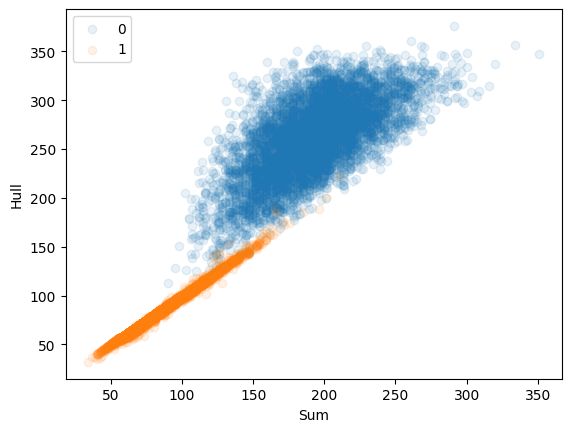

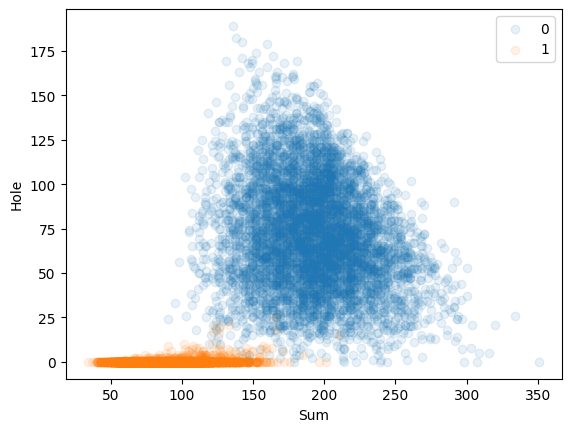

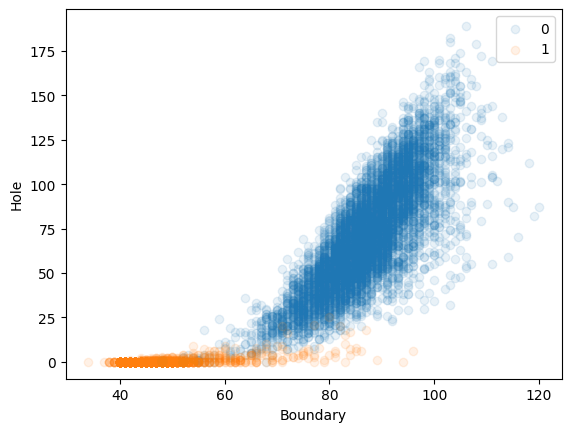

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [77]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

Which is the best combination of features?

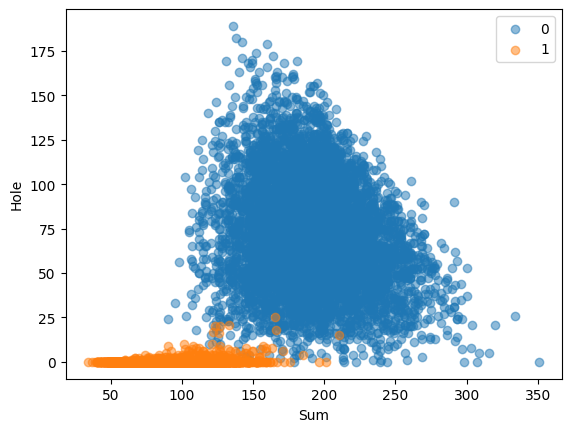

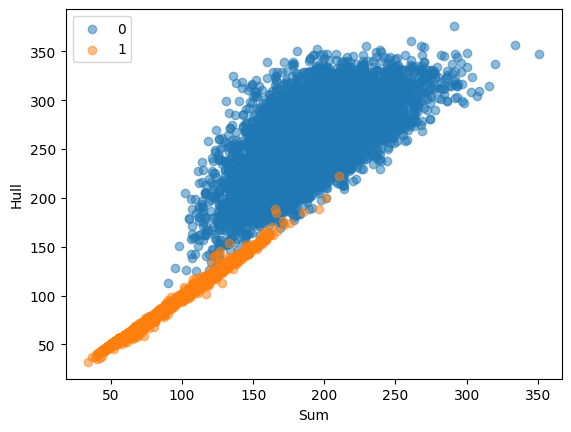

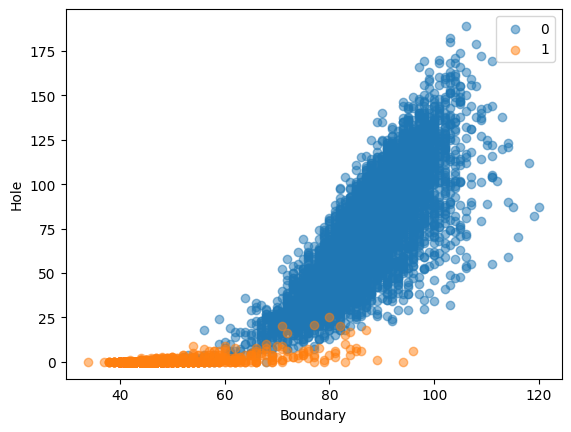

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# Assuming you have already extracted the features for class 0 and 1
# sum0, sum1 = np.array([sum of pixels for digit 0, digit 1])
# hole0, hole1 = np.array([hole pixels for digit 0, digit 1])
# hull0, hull1 = np.array([hull pixels for digit 0, digit 1])
# bound0, bound1 = np.array([boundary pixels for digit 0, digit 1])

# Combine all features and class labels
cl0 = ['class 0'] * len(sum0)
cl1 = ['class 1'] * len(sum1)

# Create a DataFrame with the features
df = pd.DataFrame({
    'Sum': np.concatenate((sum0, sum1)),
    'Hole': np.concatenate((hole0, hole1)),
    'Hull': np.concatenate((hull0, hull1)),
    'Boundary': np.concatenate((bound0, bound1)),
    'Class': np.concatenate((cl0, cl1))
})

# Pairwise scatter plots to visualize feature combinations
# Sum vs Hole
plt.scatter(df['Sum'][df['Class']=='class 0'], df['Hole'][df['Class']=='class 0'], alpha=0.5, label='0')
plt.scatter(df['Sum'][df['Class']=='class 1'], df['Hole'][df['Class']=='class 1'], alpha=0.5, label='1')
plt.xlabel('Sum'); plt.ylabel('Hole'); plt.legend(); plt.show()

# Sum vs Hull
plt.scatter(df['Sum'][df['Class']=='class 0'], df['Hull'][df['Class']=='class 0'], alpha=0.5, label='0')
plt.scatter(df['Sum'][df['Class']=='class 1'], df['Hull'][df['Class']=='class 1'], alpha=0.5, label='1')
plt.xlabel('Sum'); plt.ylabel('Hull'); plt.legend(); plt.show()

# Boundary vs Hole
plt.scatter(df['Boundary'][df['Class']=='class 0'], df['Hole'][df['Class']=='class 0'], alpha=0.5, label='0')
plt.scatter(df['Boundary'][df['Class']=='class 1'], df['Hole'][df['Class']=='class 1'], alpha=0.5, label='1')
plt.xlabel('Boundary'); plt.ylabel('Hole'); plt.legend(); plt.show()

# 3D plot of Sum, Hull, and Hole using plotly
fig = px.scatter_3d(df, x='Sum', y='Hull', z='Hole', color='Class', opacity=0.5)
fig.show()


 How would you test or visualize four or more features?
 We can use dimensionality reduction techniques like PCA or t-SNE to project higher-dimensional data (4 features) into a lower-dimensional space (2D or 3D) for visualization

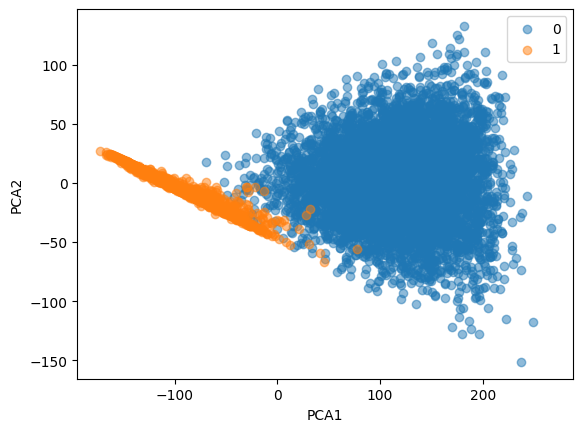

In [79]:
from sklearn.decomposition import PCA

# Extract the features and class labels
X = df[['Sum', 'Hole', 'Hull', 'Boundary']].values
y = df['Class'].values

# Apply PCA to reduce dimensions to 2 or 3 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the results of PCA in 2D
plt.scatter(X_pca[y=='class 0', 0], X_pca[y=='class 0', 1], alpha=0.5, label='0')
plt.scatter(X_pca[y=='class 1', 0], X_pca[y=='class 1', 1], alpha=0.5, label='1')
plt.xlabel('PCA1'); plt.ylabel('PCA2'); plt.legend(); plt.show()

# For 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

fig = px.scatter_3d(x=X_pca_3d[:,0], y=X_pca_3d[:,1], z=X_pca_3d[:,2], color=y)
fig.show()


Can you come up with your own features?
New features could include:

Aspect ratio: height/width of the digit.
Symmetry: comparing the left half of the image with the right half.
Curvature: identifying curved shapes in the digit.

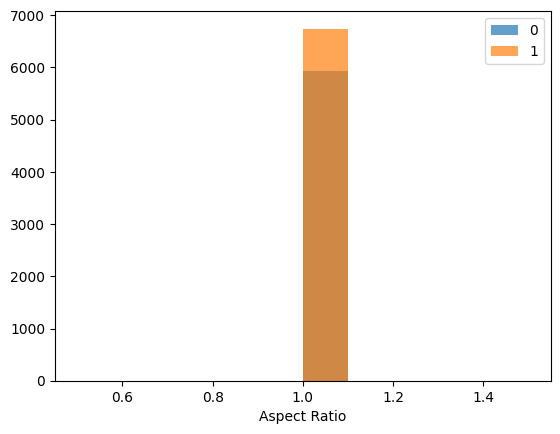

In [80]:
def get_aspect_ratio(img):
    return img.shape[0] / img.shape[1]

# Compute aspect ratios for class 0 and 1
aspect_ratio0 = np.array([get_aspect_ratio(i) for i in no0])
aspect_ratio1 = np.array([get_aspect_ratio(i) for i in no1])

# Plot aspect ratio
plt.hist(aspect_ratio0, alpha=0.7, label='0')
plt.hist(aspect_ratio1, alpha=0.7, label='1')
plt.xlabel('Aspect Ratio'); plt.legend(); plt.show()


 Will these features work for different classes other than 0 and 1?
You can extend the same code to different digit classes. For example, we can extract features for digits "2" and "3" and check how well the features work for distinguishing them.

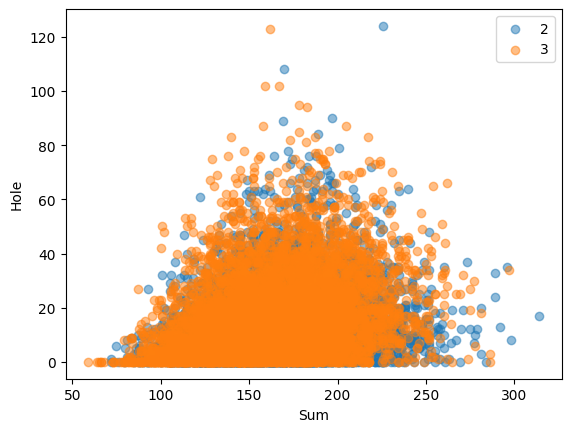

In [81]:
# Extract images for digits 2 and 3
no2 = train_X[train_y==2,:,:]
no3 = train_X[train_y==3,:,:]

# Compute the same features for these new classes
sum2 = np.sum(no2>0, (1,2))
sum3 = np.sum(no3>0, (1,2))
hole2 = np.array([getHolePixels(i).sum() for i in no2])
hole3 = np.array([getHolePixels(i).sum() for i in no3])
hull2 = np.array([getHullPixels(i).sum() for i in no2])
hull3 = np.array([getHullPixels(i).sum() for i in no3])
bound2 = np.array([getBoundaryPixels(i).sum() for i in no2])
bound3 = np.array([getBoundaryPixels(i).sum() for i in no3])

# Combine the features for digits 2 and 3 and plot
df2_3 = pd.DataFrame({
    'Sum': np.concatenate((sum2, sum3)),
    'Hole': np.concatenate((hole2, hole3)),
    'Hull': np.concatenate((hull2, hull3)),
    'Boundary': np.concatenate((bound2, bound3)),
    'Class': np.concatenate((['class 2']*len(sum2), ['class 3']*len(sum3)))
})

plt.scatter(df2_3['Sum'][df2_3['Class']=='class 2'], df2_3['Hole'][df2_3['Class']=='class 2'], alpha=0.5, label='2')
plt.scatter(df2_3['Sum'][df2_3['Class']=='class 3'], df2_3['Hole'][df2_3['Class']=='class 3'], alpha=0.5, label='3')
plt.xlabel('Sum'); plt.ylabel('Hole'); plt.legend(); plt.show()


5. What happens if we take more than two classes at a time?
We can extend this to multiple classes (e.g., digits 0, 1, and 2) and visualize or classify the combined dataset. You could use t-SNE for better visualization in 2D or 3D.

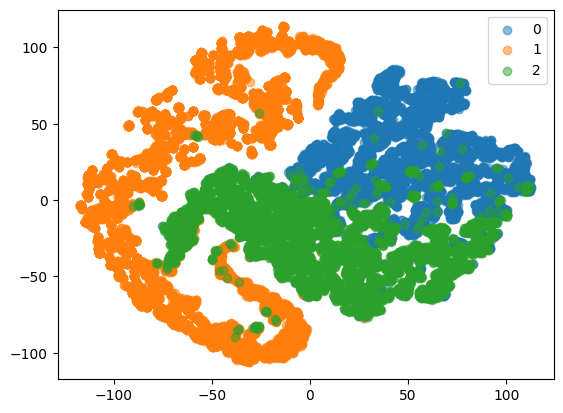

In [84]:
from sklearn.manifold import TSNE

# Combine features for digits 0, 1, and 2
cl2 = ['class 2'] * len(sum2)
df_multi = pd.DataFrame({
    'Sum': np.concatenate((sum0, sum1, sum2)),
    'Hole': np.concatenate((hole0, hole1, hole2)),
    'Hull': np.concatenate((hull0, hull1, hull2)),
    'Boundary': np.concatenate((bound0, bound1, bound2)),
    'Class': np.concatenate((cl0, cl1, cl2))
})

# Use t-SNE for visualization of multiple classes
X_multi = df_multi[['Sum', 'Hole', 'Hull', 'Boundary']].values
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_multi)

# Plot t-SNE result
plt.scatter(X_tsne[df_multi['Class']=='class 0', 0], X_tsne[df_multi['Class']=='class 0', 1], alpha=0.5, label='0')
plt.scatter(X_tsne[df_multi['Class']=='class 1', 0], X_tsne[df_multi['Class']=='class 1', 1], alpha=0.5, label='1')
plt.scatter(X_tsne[df_multi['Class']=='class 2', 0], X_tsne[df_multi['Class']=='class 2', 1], alpha=0.5, label='2')
plt.legend(); plt.show()
